# Scenario

Imagine that this project aims to enhance customer engagement in the novel book sales segment for Amazon. The client seeks to gain a deeper understanding of their customers' preferences and explore ways to improve novel book sales on their platform.

# Preparation

Before diving into data manipulation, it is essential to ensure that the dataset meets the necessary criteria to be considered a valuable resource for answering questions and addressing the stakeholders' problem.

# Description of Data Source

The dataset used in this project was obtained from Kaggle, specifically from the web page titled "Top 50 Bestselling Novels 2009-2021 of Amazon." It comprises data on the top 50 bestselling novels on Amazon each year from 2009 to 2021. The data was collected from the Amazon.com website and Kaggle, and it was inspired by Greywasp's "Top 50 Bestselling Novels 2009-2020 of Amazon."

- Format: The dataset is in CSV file format.
- Data Period: The data covers the years 2009 to 2021.
- License: The dataset is released under the CC0 license and is in the public domain.
- Size: The dataset size is approximately 37 Kb.
- Sources: The data was collected from Amazon.com, and Kaggle served as an additional source. Furthermore, the book prices have been rounded up and reflect the prices as of August 18, 2022.
- Author: The dataset was created by Greywasp.

## Process

Now comes the exciting part. In this stage, I will delve into data wrangling to prepare the dataset for the Analysis stage. Although the dataset is not extensive, I have chosen to use VScode for data manipulation and analysis to enhance my programming skills and prepare myself for larger datasets. Additionally, I will leverage Tableau for creating visually appealing and insightful visualizations, ensuring a polished and impactful deliverable for my stakeholders.

The process will follow the following structure:

1. Identify relevant data: Carefully examine the dataset to identify the key variables and information necessary for the analysis.
2. Establish a format: Define a standardized format for the dataset, ensuring consistency and ease of analysis.
3. Data cleaning: Apply various techniques to clean the dataset, including handling missing values, removing duplicates, and addressing inconsistencies.
4. Validation: Validate the cleaned dataset to ensure its integrity and accuracy for subsequent analysis.

By following this process, I aim to create a reliable and well-prepared dataset for conducting insightful analysis and generating meaningful visualizations.

## Loading libraries


In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import re
import matplotlib.pyplot as plt
from IPython import display

# Define o caminho base
base_path = Path.cwd()

# Define o caminho relativo para a pasta de dados
data_folder = base_path /"Dados"

# Define o caminho para o arquivo de dicionário
folder_path = data_folder / "Amazon Top 50 Books 2009-2021.csv"


# Lendo o arquivo 
df = pd.read_csv(folder_path)


In [17]:
# Olhando as primeiras linhas
df.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [18]:
# informações sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [19]:
df.describe()

,User Rating,Year
count,650.000000,650.000000
mean,4.635385,2015.000000
std,0.221517,3.744539
min,3.300000,2009.000000
25%,4.500000,2012.000000
50%,4.700000,2015.000000
75%,4.800000,2018.000000
max,4.900000,2021.000000


In [20]:
# Deletando a coluna de preços, já que temos a coluna de preços arrendondados
df_2 = df.drop("Price", axis = 1)

# Remover o símbolo "$" da coluna "Price_r"
df_2['Price_r'] = df_2['Price_r'].replace({'\$': ''}, regex=True)


In [21]:
# Contando a quantidade de livros de ficção e de livros de não ficção
contagem = df_2['Genre'].value_counts()
contagem


Genre
Non Fiction    363
Fiction        287
Name: count, dtype: int64

Text(0, 0.5, 'Quantidade de Livros')

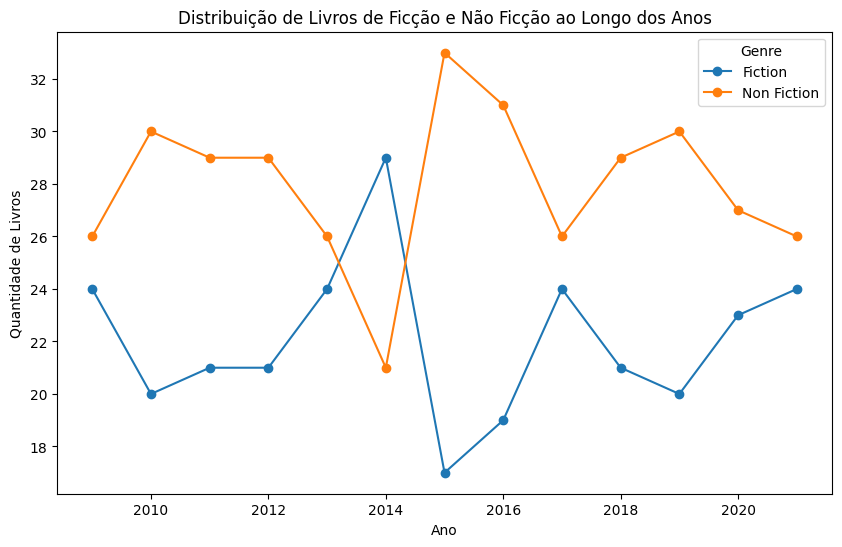

In [22]:
# contando o número de livros de ficção vs não ficção ao longo dos anos
grupo = df_2.groupby("Year")["Genre"].value_counts().unstack()

# Plotar o gráfico de linha
grupo.plot(kind = 'line', marker = 'o', figsize = (10, 6))

# Configurar o título e os rótulos dos eixos
plt.title('Distribuição de Livros de Ficção e Não Ficção ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Livros')

In [23]:
# Filtrar livros que apareceram mais de uma vez
livros_repetidos = df_2['Name'].value_counts()
livros_repetidos = livros_repetidos[livros_repetidos > 1]

# Contagem por gênero
contagem_por_genero = df_2[df_2['Name'].isin(livros_repetidos.index)]['Genre'].value_counts()

contagem_por_genero

Genre
Non Fiction    198
Fiction        143
Name: count, dtype: int64

This demonstrates that we have more non-fiction books that have appeared on the bestseller list for multiple years. Popularity of non-fiction: It is possible that the topics covered in non-fiction books are more relevant and popular among readers.

In [24]:

df_2['Price_r'] = df_2['Price_r'].astype(float) # para deixar Price_r como float


In [25]:
# média preço de ficção e não ficção ao longo dos anos,por gênero
grupo_2 = df_2.groupby(["Year", "Genre"])["Price_r"].mean().unstack()

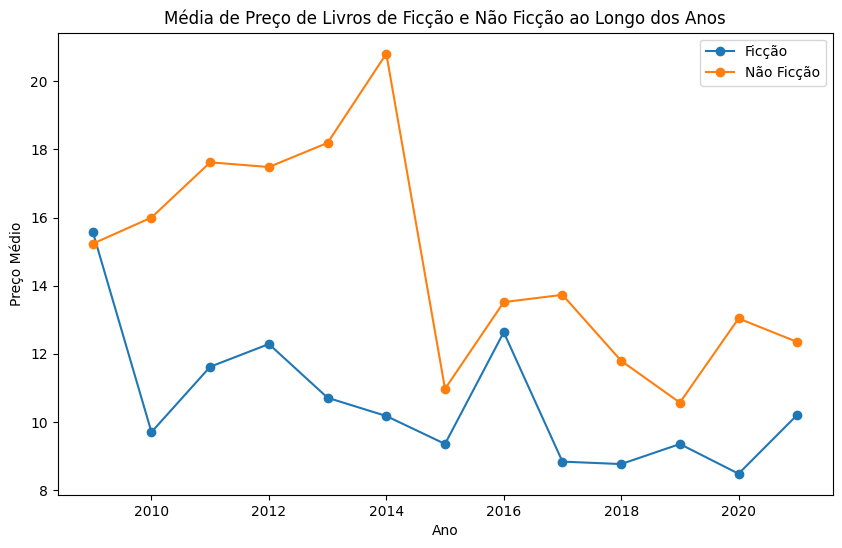

In [26]:
# Agrupar por ano e gênero e calcular a média de preço
grupo_2 = df_2.groupby(["Year", "Genre"])["Price_r"].mean().unstack()

# Plotar o gráfico de linha
grupo_2.plot(kind='line', marker='o', figsize=(10, 6))

# Configurar o título e os rótulos dos eixos
plt.title('Média de Preço de Livros de Ficção e Não Ficção ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')

# Adicionar a legenda
plt.legend(['Ficção', 'Não Ficção'])


It is interesting to note that the average prices of both fiction and non-fiction books have declined after 2014. Why could this be? Could it be due to the popularization of Kindle?

In [27]:
# rating médio de ficção vs não ficção ao longo dos anos, por gênero
grupo_3 = df_2.groupby(["Year", "Genre"])["User Rating"].mean().unstack()

Text(0, 0.5, 'Rating médio por ano')

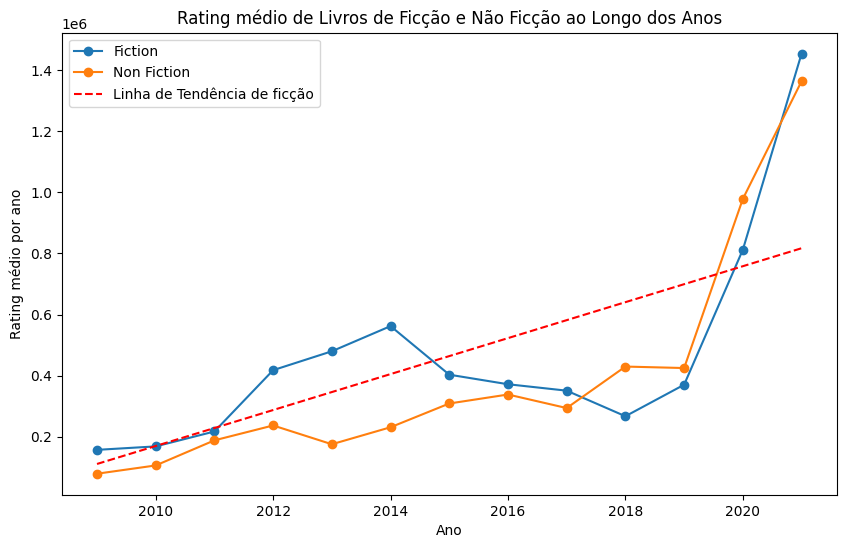

In [31]:
## Plotar o gráfico de linha
grupo_3.plot(kind = 'line', marker = 'o', figsize=(10, 6))

## Definir x como o índice de grupo_3
x = grupo_3.index

## Definir y como a soma das colunas 'Fiction' e 'Non Fiction' de grupo_3
y = grupo_3['Fiction'] 

## Definir o grau do polinômio da linha de tendência como 1
degree = 1

## Calcular os coeficientes do polinômio de ajuste
coefficients = np.polyfit(x, y, degree)

## Criar uma função polinomial a partir dos coeficientes
polynomial = np.poly1d(coefficients)

## Definir o intervalo de valores de x para o qual queremos plotar a linha de tendência
x_range = np.arange(x.min(), x.max() + 1)

## Plotar a linha de tendência usando a função polinomial
plt.plot(x_range, polynomial(x_range), color='red', linestyle='--', label='Linha de Tendência de ficção')

## Adicionar a legenda da linha de tendência
plt.legend(loc='best')

## Definir o título do gráfico
plt.title('Rating médio de Livros de Ficção e Não Ficção ao Longo dos Anos')

## Definir o rótulo do eixo x
plt.xlabel('Ano')

## Definir o rótulo do eixo y
plt.ylabel('Rating médio por ano')


Why did the average rating increase? One hypothesis could be that the number of reviews has increased over the years. Is it possible?

In [32]:
# Remover as vírgulas dos valores na coluna "Reviews" usando regex
df_2['Reviews'] = df_2['Reviews'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Converter a coluna "Reviews" para float
df_2['Reviews'] = df_2['Reviews'].astype(float)

Text(0.1, 1.1, '1e6 = Valores em milhões')

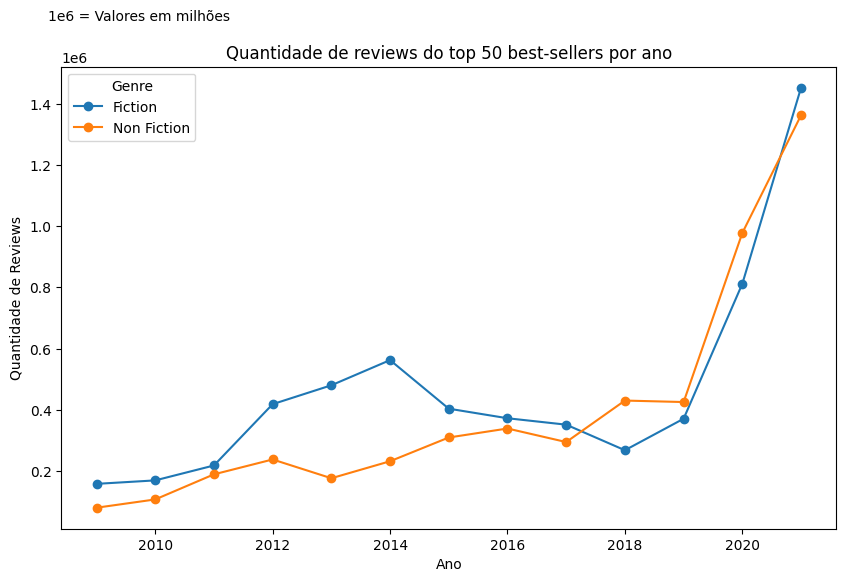

In [33]:
grupo_3 = df_2.groupby(["Year", "Genre"])["Reviews"].sum().unstack()

# Plotar o gráfico de linha
grupo_3.plot(kind='line', marker='o', figsize=(10, 6))

# Configurar o título e os rótulos dos eixos
plt.title('Quantidade de reviews do top 50 best-sellers por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Reviews')
# Adicione a legenda explicativa
plt.text(0.1, 1.1, '1e6 = Valores em milhões', transform=plt.gca().transAxes, ha='center')

# Next Steps

In this section, I propose several action points aimed at enhancing sales based on the insights obtained from the previous analysis.

# Findings:

1) Non-fiction books have a greater presence in total sales.
2) Non-fiction customers are more willing to pay higher prices for books compared to fiction customers.
3) Overall, customers are writing more reviews, and the ratings of those reviews have increased.
4) Customers, on average, are willing to pay $11 for books.

# Suggestion:

One suggestion for Amazon based on these conclusions is to capitalize on the popularity and interest of customers in non-fiction books by investing in a dedicated section for this genre on the platform. This can include specialized curation, personalized recommendations, and exclusive offers for customers who show an interest in this type of reading.

Additionally, Amazon can consider expanding its selection of non-fiction books by seeking partnerships with renowned authors and subject matter experts in popular topics. This would help attract more customers and reinforce the platform's reputation as a trusted destination for acquiring quality books.

Furthermore, Amazon should continue to encourage customers to leave reviews and share their opinions about the books they have purchased. This can be done through rewards programs where customers who leave detailed and helpful reviews are incentivized with discounts or exclusive benefits.

These strategies would allow Amazon to leverage the popularity of non-fiction books, enhance the customer experience, and drive sales in this specific segment.